In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


/kaggle/input/feature-engineering/defcc (1).csv


In [ ]:
default=pd.read_csv('defcc (1).csv')

In [4]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

<h2>Let's explore PAY and defaults</h2>

In [6]:
#pd.crosstab(default['PAY_3'],default['dpnm'], normalize='index')
#pd.crosstab(default['PAY_1'],default['dpnm'], normalize='index')
#pd.crosstab(default['PAY_1'],default['dpnm'])
#pd.crosstab(default['PAY_1'],default['dpnm'])

dpnm,0,1
PAY_1,,
-2,2394,365
-1,4732,954
0,12849,1888
1,2436,1252
2,823,1844
3,78,244
4,24,52
5,13,13
6,5,6


<h2>Binning values</h2>

In [8]:
#define bins

bins= [-3,0,1,10]

#name of groups
groups = ['Low', 'Med' , 'High']

default['PAY_1_g'] = pd.cut(default['PAY_1'], bins=bins, labels=groups)

default[['PAY_1', 'PAY_1_g']].head(20)

,PAY_1,PAY_1_g
0,2,High
1,-1,Low
2,0,Low
3,0,Low
4,-1,Low
5,0,Low
6,0,Low
7,0,Low
8,0,Low
9,-2,Low


In [9]:
#Creating dummies
cat_vars=['PAY_1_g']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(default[var], prefix=var)
    default1=default.join(cat_list)
    default=default1
    

data_vars=default.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [10]:
default2=default1[to_keep]

default2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm,PAY_1_g_Low,PAY_1_g_Med,PAY_1_g_High
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,False,False,True
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,True,False,False
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,True,False,False
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,True,False,False
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,True,False,False


<h2>We try to fit a simple model</h2>

In [11]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

X_def = sm.add_constant(default2['PAY_1']) 
Y_def=default2['dpnm']

x_train,x_test,y_train,y_test = train_test_split(X_def,Y_def,test_size=0.3,random_state=42)
#len(x_test),len(x_train),len(y_train),len(y_test)
y_train = np.ravel(y_train)

In [12]:
   
# building the model and fitting the data 
log_reg = sm.Logit(Y_def, X_def).fit(maxiter=10000) 
# printing the summary table 
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.475526
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   dpnm   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29998
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                  0.1001
Time:                        07:45:28   Log-Likelihood:                -14266.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4025      0.016    -89.924      0.000      -1.433      -1.372
PAY_1          0.7372      0.

In [13]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
prob_test = logit.predict_proba(x_test)[:,1]


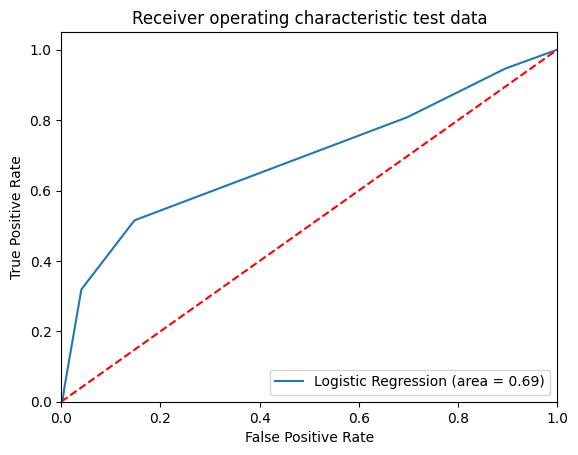

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y_test, prob_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_test, prob_test)
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [19]:
X_def = sm.add_constant(default2[['PAY_1_g_Med','PAY_1_g_High']].astype(float)) 
Y_def=default2['dpnm']

x_train,x_test,y_train,y_test = train_test_split(X_def,Y_def,test_size=0.3,random_state=42)
#len(x_test),len(x_train),len(y_train),len(y_test)
y_train = np.ravel(y_train)

In [20]:
# defining the dependent and independent variables 

   
# building the model and fitting the data 
log_reg2 = sm.Logit(Y_def, X_def).fit(maxiter=10000) 
# printing the summary table 
print(log_reg2.summary()) 

Optimization terminated successfully.
         Current function value: 0.453478
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   dpnm   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29997
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                  0.1418
Time:                        07:52:52   Log-Likelihood:                -13604.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.8291      0.019    -96.154      0.000      -1.866      -1.792
PAY_1_g_Med      1.1635

In [21]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
prob_test = logit.predict_proba(x_test)[:,1]

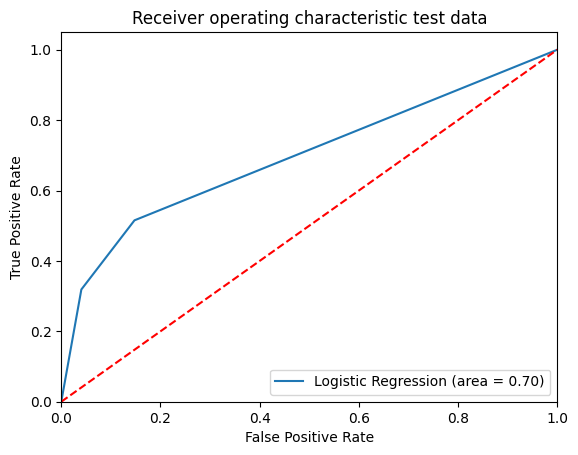

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y_test, prob_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_test, prob_test)
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
X_def = sm.add_constant(default2[['PAY_1_g_Med','PAY_1_g_High']].astype(float)) 
Y_def=default2['dpnm']

x_train,x_test,y_train,y_test = train_test_split(X_def,Y_def,test_size=0.3,random_state=42)
#len(x_test),len(x_train),len(y_train),len(y_test)
y_train = np.ravel(y_train)

In [ ]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
prob_test = logit.predict_proba(x_test)[:,1]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y_test, prob_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_test, prob_test)
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h2>Ett annat sätt att skapa dummies</h2>

In [23]:
#name of groups
groups = ['Low', 'Med', 'High', 'Exp']

default2['LIMIT_BAL_qcut'] = pd.qcut(default2['LIMIT_BAL'], q=4, labels=groups)
default2[['LIMIT_BAL', 'LIMIT_BAL_qcut']].head()

,LIMIT_BAL,LIMIT_BAL_qcut
0,20000,Low
1,120000,Med
2,90000,Med
3,50000,Low
4,50000,Low


In [24]:
LIMIT_dum=pd.get_dummies(data=default2['LIMIT_BAL_qcut'], columns=['LIMIT_BAL_qcut'], drop_first=True)

default2=pd.concat([default2,LIMIT_dum],axis=1)

In [25]:
X_def = sm.add_constant(default2[['PAY_1_g_Med','PAY_1_g_High','Med','High','Exp']].astype(float)) 
Y_def=default2['dpnm']

x_train,x_test,y_train,y_test = train_test_split(X_def,Y_def,test_size=0.3,random_state=42)
#len(x_test),len(x_train),len(y_train),len(y_test)
y_train = np.ravel(y_train)

In [26]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
prob_test = logit.predict_proba(x_test)[:,1]

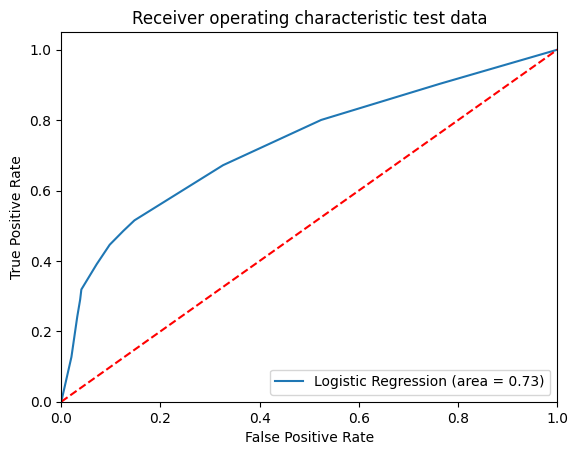

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y_test, prob_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_test, prob_test)
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h2>En variabel som betraktar "PAY" för de senaste tre månaderna</h2>

In [28]:
def bad_pay(x,y,z):
    if x <= -1 & y<= -1 & z<=-1:
        return 'good'
    if x > 0 | y > 0 | z > 0:
        return 'bad'
    else:
        return 'ok'

In [29]:
default2['Bad_Pay']=default2.apply(lambda x: bad_pay(x['PAY_1'],x['PAY_2'],x['PAY_3']),axis=1)

In [30]:
PAY_BAD_dum=pd.get_dummies(data=default2['Bad_Pay'], columns=['Bad_Pay'])

default2=pd.concat([default2,PAY_BAD_dum],axis=1)

In [31]:
X_def = sm.add_constant(default2[['PAY_1_g_Med','PAY_1_g_High','Med','High','Exp','ok','bad']].astype(float)) 
Y_def=default2['dpnm']

x_train,x_test,y_train,y_test = train_test_split(X_def,Y_def,test_size=0.3,random_state=42)
#len(x_test),len(x_train),len(y_train),len(y_test)
y_train = np.ravel(y_train)

In [32]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
prob_test = logit.predict_proba(x_test)[:,1]

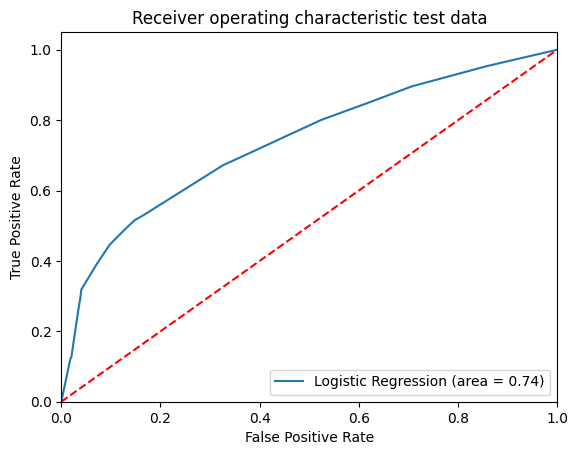

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y_test, prob_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_test, prob_test)
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
X_def = sm.add_constant(default2[['PAY_1_g_Med','PAY_1_g_High','Med','High','Exp','ok','bad']].astype(float)) 
Y_def=default2['dpnm']

from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X_def)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_std, Y_def,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=Y_def)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model =LogisticRegressionCV(Cs=np.linspace(0.001,0.01,100), fit_intercept=True, cv=5, dual=False, 
                   intercept_scaling=1, l1_ratios=np.linspace(0.001,0.001,1), refit=True, max_iter=1000,
                   n_jobs=None, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.0001, verbose=0).fit(x_train, y_train)

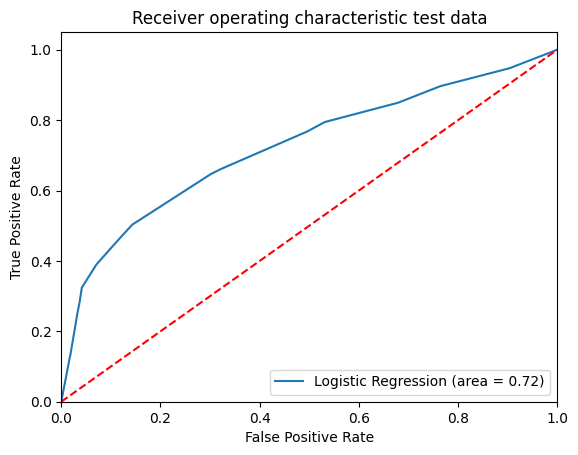

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_test = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr_test, tpr_test, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h2>Why can't we just start selecting variables without any feature engineering for this data if we want a model that is easy to interpret?</h2>